In [1]:
import numpy as np
import matplotlib.pyplot as plt
from inference.gp import GpRegressor
from inference.gp import RationalQuadratic, SquaredExponential, WhiteNoise

Gather the data

In [ ]:
data = np.genfromtxt("data/step_results.csv", delimiter=",", names=True)

Train the GP model

In [ ]:
training_points = [(tau, eta) for tau, eta in zip(data["tau_bzs"], data["eta_TES"])]
GP = GpRegressor(training_points, data["I_stkg"], kernel=SquaredExponential)
# @Samuele, what kernel did you use in Matlab?

Sample space for plotting

In [ ]:
N_tau = 15
N_eta = 15
tau_refined = np.linspace(0, 240 * 3600, num=N_tau)
eta_TES_refined = np.linspace(0, 1, num=N_eta)
XX, YY = np.meshgrid(tau_refined, eta_TES_refined)
gp_coords = [(tau, eta) for tau in tau_refined for eta in eta_TES_refined]
mu, sig = GP(gp_coords)

Plot

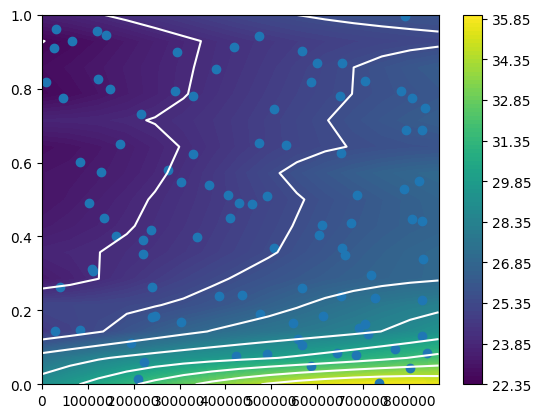

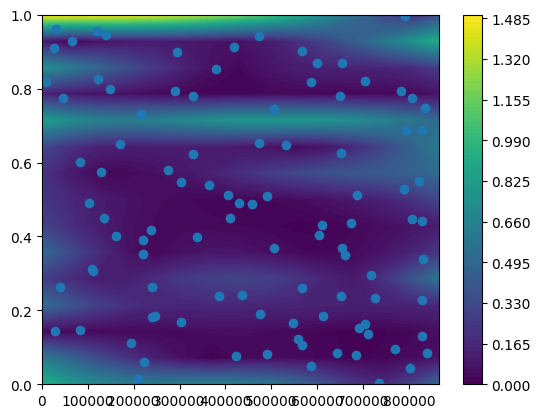

In [ ]:
plt.figure()

CF = plt.contourf(XX, YY, mu.reshape([N_tau, N_eta]).T, levels=100)
plt.contour(XX, YY, mu.reshape([N_tau, N_eta]).T, levels=8, colors="white")

plt.scatter(data["tau_bzs"], data["eta_TES"])
plt.colorbar(CF)

plt.figure()

CF = plt.contourf(XX, YY, sig.reshape([N_tau, N_eta]).T, levels=100)

plt.scatter(data["tau_bzs"], data["eta_TES"])
plt.colorbar(CF)
plt.show()
